In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree

In [2]:
class DecisionTree():
    """
    
    Decision Tree Classifier
    
    Attributes:
        root: Root Node of the tree.
        max_depth: Max depth allowed for the tree
        size_allowed : Min_size split, smallest size allowed for split 
        n_features: Number of features to use during building the tree.(Random Forest)
        n_split:  Number of split for each feature. (Random Forest)
    
    """

    def __init__(self, max_depth = 1000, size_allowed = 1, n_features = None, n_split = None):
        """
        
            Initializations for class attributes.
            
            TODO: 1. Modify the initialization of the attributes of the Decision Tree classifier
        """
        
        self.root = None             
        self.max_depth = max_depth        
        self.size_allowed = size_allowed      
        self.n_features = n_features       
        self.n_split = n_split           
    
    
    class Node():
        """
            Node Class for the building the tree.

            Attribute: 
                threshold: The threshold like if x1 < threshold, for spliting.
                feature: The index of feature on this current node.
                left: Pointer to the node on the left.
                right: Pointer to the node on the right.
                pure: Bool, describe if this node is pure.
                predict: Class, indicate what the most common Y on this node.

        """
        def __init__(self, threshold = None, feature = None):
            """
            
                Initializations for class attributes.
                
                TODO: 2. Modify the initialization of the attributes of the Node. (Initialize threshold and feature)
            """
            
            
            self.threshold = threshold   
            self.feature = feature    
            self.left = None
            self.right = None
            self.pure = False
            self.depth = None
            self.predict = None
    
    
    def entropy(self, lst):
        """
            Function Calculate the entropy given lst.
            
            Attributes: 
                entro: variable store entropy for each step.
                classes: all possible classes. (without repeating terms)
                counts: counts of each possible classes.
                total_counts: number of instances in this lst.
                
            lst is vector of labels.
                
            
            
            TODO: 3. Intilize attributes.
                  4. Modify and add some codes to the following for-loop
                     to compute the correct entropy. 
                     (make sure count of corresponding label is not 0, think about why we need to do that.)
        """
        
        _, counts = np.unique(lst, return_counts=True) 
        counts = counts / counts.sum()
        return -(counts * np.log(counts)).sum()

    def information_gain(self, lst, values, threshold):
        """
        
            Function Calculate the information gain, by using entropy function.
            
            lst is vector of labels.
            values is vector of values for individule feature.
            threshold is the split threshold we want to use for calculating the entropy.
            
            
            TODO:
                5. Modify the following variable to calculate the P(left node), P(right node), 
                   Conditional Entropy(left node) and Conditional Entropy(right node)
                6. Return information gain.
                
                
        """
        
        
        idx = (values < threshold)
        left_prop = idx.mean()  
        right_prop = 1 - left_prop
        
        total_entropy = self.entropy(lst)
        left_entropy = self.entropy(lst[idx])
        right_entropy = self.entropy(lst[np.invert(idx)])
        
        return total_entropy - left_entropy * left_prop - right_entropy * right_prop 
    
    def find_rules(self, data):
        
        """
        
            Helper function to find the split rules.
            
            data is a matrix or 2-D numpy array, represnting training instances. 
            Each training instance is a feature vector. 
            
            TODO: 7. Modify the following for loop, which loop through each column(feature).
                     Find the unique value of each feature, and find the mid point of each adjacent value.
                  8. Store them in a list, return that list.
            
        """      
        rules = []        
        for col in data.T:          
            unique_value = np.unique(col)
            diff  = unique_value[:-1] + np.diff(unique_value)/2      
            rules.append(diff)             
        return rules
    
    def next_split(self, data, label):
        """
            Helper function to find the split with most information gain, by using find_rules, and information gain.
            
            data is a matrix or 2-D numpy array, represnting training instances. 
            Each training instance is a feature vector. 
            
            label contains the corresponding labels. There might be multiple (i.e., > 2) classes.
            
            TODO: 9. Use find_rules to initialize rules variable
                  10. Initialize max_info to some negative number.
        """
        
        rules = self.find_rules(data)             
        max_info = -2          
        num_col = None          
        threshold = None       
        entropy_y = self.entropy(label)      
        

        """
            TODO: 11. Check Number of features to use, None means all featurs. (Decision Tree always use all feature)
                      If n_features is a int, use n_features of features by random choice. 
                      If n_features == 'sqrt', use sqrt(Total Number of Features ) by random choice.
                      
            
        """
        
        
        if self.n_features is None :
            index_col = np.arange(data.shape[1])
        else:
            if isinstance(self.n_features, int): 
                num_index = n_features 
            elif self.n_features == 'sqrt':
                num_index = int(np.sqrt(data.shape[1]))
            np.random.seed()  
            index_col = np.random.choice(data.shape[1], num_index, replace = False)
        
        """
        
            TODO: 12. Do the similar selection we did for features, n_split take in None or int or 'sqrt'.
                  13. For all selected feature and corresponding rules, we check it's information gain. 
                  
        """
        for i in index_col:
            count_temp_rules = len(rules[i])
            
            if self.n_split is None:
                index_rules = np.arange(count_temp_rules)
            else:
                if isinstance(self.n_split, int):
                    num_rules = self.n_split    
                elif self.n_split == 'sqrt':
                    num_rules = int(np.sqrt(count_temp_rules))
                np.random.seed()
                index_rules = np.random.choice(count_temp_rules, num_rules, replace = False)

            for j in index_rules:
                info = self.information_gain(lst = label, values = data[:,i], threshold = rules[i][j])   
                if info > max_info:  
                    max_info = info
                    num_col = i
                    threshold = rules[i][j]
        return threshold, num_col
        
    def build_tree(self, X, y, depth):
        
            """
                Helper function for building the tree.
                
                TODO: 14. First build the root node.
            """
            
            
            first_threshold, first_feature = self.next_split(data = X, label = y)
            current = self.Node(first_threshold, first_feature)  
            current.depth = depth
            """
                TODO: 15. Base Case 1: Check if we pass the max_depth, check if the first_feature is None, min split size.
                          If some of those condition met, change current to pure, and set predict to the most popular label
                          and return current
                          
                
            """
            if (first_feature is None) or (self.max_depth != None and depth >= self.max_depth) \
                or (self.size_allowed != None and X.shape[0] < self.size_allowed):
                labels, cnts = np.unique(y,return_counts = True)
                current.predict = np.random.choice(labels[cnts == cnts.max()])
                current.pure = True
                return current
            
            """
               Base Case 2: Check if there is only 1 label in this node, change current to pure, and set predict to the label
            """
            
            if len(np.unique(y)) == 1:
                labels, cnts = np.unique(y,return_counts = True)
                current.predict = np.random.choice(labels[cnts == cnts.max()])
                current.pure = True
                return current
            
            """
                TODO: 16. Find the left node index with feature i <= threshold  Right with feature i > threshold.
            """
            

            
            left_index = X[:,first_feature] < first_threshold
            right_index = np.invert(left_index)
            
            """
                TODO: 17. Base Case 3: If we either side is empty, change current to pure, and set predict to the label
            """
            if left_index.sum() == 0 or right_index.sum() == 0 :
                labels, cnts = np.unique(y,return_counts = True)
                current.predict = np.random.choice(labels[cnts == cnts.max()])
                current.pure = True 
                return current
            
            
            left_X, left_y = X[left_index,:], y[left_index]
            current.left = self.build_tree(left_X, left_y, depth + 1)
                
            right_X, right_y = X[right_index,:], y[right_index]
            current.right = self.build_tree(right_X, right_y, depth + 1)
            
            return current
    

        
    def fit(self, X, y):
        
        """
            The fit function fits the Decision Tree model based on the training data. 
            
            X_train is a matrix or 2-D numpy array, represnting training instances. 
            Each training instance is a feature vector. 

            y_train contains the corresponding labels. There might be multiple (i.e., > 2) classes.
        """
        self.root = self.build_tree(X, y, 1)
        

        self.for_runing = y[0]
        return self
            
    def ind_predict(self, inp):
        """
            Predict the most likely class label of one test instance based on its feature vector x.
            
            TODO: 18. Modify the following while loop to get the prediction.
                      Stop condition we are at a node is pure.
                      Trace with the threshold and feature.
                19. Change return self.for_runing to appropiate value.
        """
        cur = self.root  
        while not cur.pure:  
            
            feature = cur.feature
            threshold = cur.threshold
            
            if inp[feature] < threshold:  
                cur = cur.left
            else:
                cur = cur.right
        return cur.predict
    
    def predict(self, inp):
        """
            X is a matrix or 2-D numpy array, represnting testing instances. 
            Each testing instance is a feature vector. 
            
            Return the predictions of all instances in a list.
            
            TODO: 20. Revise the following for-loop to call ind_predict to get predictions.
        """
        
        result = []
        for i in range(inp.shape[0]):
            result.append(self.ind_predict(inp[i]))
        return result
    




In [3]:
url_Wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url_Wine, delimiter=';')

In [4]:
X = np.array(wine)[:, :-1]
y = np.array(wine)[:, -1]
y = np.array(y.flatten())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
tree = DecisionTreeClassifier("entropy")
tree = tree.fit(X_train, y_train)
clf = DecisionTree()
clf = clf.fit(X_train, y_train)

### Train Error should be 0

In [7]:
### My Model
pred = clf.predict(X_train)
(pred == y_train).mean()

1.0

In [8]:
### Sklearn Model
pred = tree.predict(X_train)
(pred == y_train).mean()

1.0

### Test Error should be around 0.62

In [9]:
### My Model
pred = clf.predict(X_test)
(pred == y_test).mean()

0.628125

In [10]:
### Sklearn Model
pred = tree.predict(X_test)
(pred == y_test).mean()

0.609375

# Random Forest

In [11]:
class RandomForest():
    
    """
    
    RandomForest Classifier
    
    Attributes:
        n_trees: Number of trees. 
        trees: List store each individule tree
        n_features: Number of features to use during building each individule tree.
        n_split: Number of split for each feature.
        max_depth: Max depth allowed for the tree
        size_allowed : Min_size split, smallest size allowed for split 
    
    """
    
    def __init__(self,n_trees = 10, n_features = 'sqrt', n_split = 'sqrt', max_depth = None, size_allowed = 1):
        
        """
            Initilize all Attributes.
            
            TODO: 1. Intialize n_trees, n_features, n_split, max_depth, size_allowed.
        """
        self.n_trees = n_trees
        self.trees = []
        self.n_features = n_features
        self.n_split = n_split
        self.max_depth = max_depth
        self.size_allowed = size_allowed
        
        
    def fit(self, X,y):
        
        """
            The fit function fits the Random Forest model based on the training data. 
            
            X_train is a matrix or 2-D numpy array, represnting training instances. 
            Each training instance is a feature vector. 
            
            y_train contains the corresponding labels. There might be multiple (i.e., > 2) classes.
            
        
            TODO: 2. Modify the following for loop to create n_trees tress. by calling DecisionTree we created.
                     Pass in all the attributes.
        """
        for i in range(self.n_trees):
            np.random.seed()
            temp_clf = DecisionTree(max_depth = self.max_depth, size_allowed = self.size_allowed,
                                    n_features = self.n_features, n_split = self.n_split)
            temp_clf.fit(X, y)
            self.trees.append(temp_clf)
        return self
            
    def ind_predict(self, inp):
        
        """
            Predict the most likely class label of one test instance based on its feature vector x.
        
            TODO: 4. Modify the following code to predict using each Decision Tree.
        """
        result = []
        for tree in self.trees:
            result.append(tree.ind_predict(inp))
            
                
        """
            TODO: 5. Modify the following code to find the correct prediction use majority rule.
                     If there is a tie, use random choice to select one of them.
        """
        labels, counts = np.unique(result, return_counts = True)
        return np.random.choice(labels[counts == max(counts)])
    
    def predict_all(self, inp):
        
        """
            X is a matrix or 2-D numpy array, represnting testing instances. 
            Each testing instance is a feature vector. 
            
            Return the predictions of all instances in a list.
            
            TODO: 6. Revise the following for-loop to call ind_predict to get predictions
        """
        result = []
        for row in inp:
            result.append(self.ind_predict(row))
        return result

### Test Accruacy should be greater than 0.69

In [12]:
clf = RandomForest(n_trees= 100)
clf = clf.fit(X_train, y_train)

In [13]:
### My Model - Train Accuracy
pred = clf.predict_all(X_train)
(pred == y_train).mean()

1.0

In [14]:
### My Model - Test Accuracy
pred = clf.predict_all(X_test)
(pred == y_test).mean()

0.721875

In [15]:
### Sklearn Model - Train
skclf = RandomForestClassifier(criterion='entropy')
skclf = skclf.fit(X_train, y_train)

In [16]:
### Sklearn Model - Train Accuracy
pred = skclf.predict(X_train)
(pred == y_train).mean()

1.0

In [17]:
### Sklearn Model - Test Accuracy
pred = skclf.predict(X_test)
(pred == y_test).mean()

0.709375

In [18]:
test_accs = []
train_accs = []

### Experiment with different 

In [19]:
for i in [1,10,100,1000]:
    clf = RandomForest(n_trees= i)
    clf.fit(X_train, y_train)
    pred = clf.predict_all(X_test)
    test_accs.append((pred == y_test).mean())
    pred = clf.predict_all(X_train)
    train_accs.append((pred == y_train).mean())

In [20]:
import matplotlib.pyplot as plt

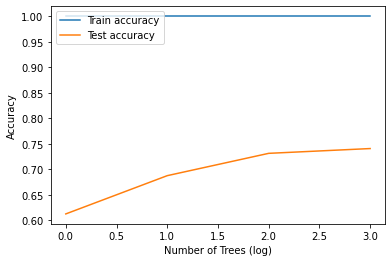

In [21]:
f = plt.figure()
ax = f.subplots()
# plot training and validation accuracy
ax.plot(train_accs, label = "Train accuracy")
ax.plot(test_accs, label = "Test accuracy")
ax.legend(loc='upper left')
ax.set_xlabel("Number of Trees (log)")
ax.set_ylabel("Accuracy")
plt.show()